_Hotel Reservations Cancellation Prediction_
-

### Data Dictionary

| Column Name | Description |
| --- | --- |
|Booking_ID|unique identifier of each booking|
|no_of_adults|number of adults|
|no_of_children|number of children|
|no_of_weekend_nights|number of weekend nights  (Saturday or Sunday)|
|no_of_week_nights|number of week nights (Monday to Friday)|
|meal_type|meal type booked by the customer|
|required_car_parking_spaces| Does the customer require a car parking space? (0 - No, 1- Yes)|
|room_type_reserved | Type of the room reserved by the guest|
|lead_time|Number of days between the date of booking and the arrival date|
|arrival_year|Year of arrival|
|arrival_month|Month of arrival|
|arrival_date|Date of arrival|
|market_segment|Market segment designation|
|repeated_guest | Is the customer a repeated guest? (0 - No, 1- Yes)|
|no_previous_cancellations| Number of previous bookings that were canceled by the customer prior to the current booking|
|previous_bookings_not_canceled|Number of previous bookings not canceled by the customer prior to the current booking|
|avg_price_per_room|Average price per day of the reservation; prices of the rooms are dynamic. (in euros)|
|no_of_special_requests|Total number of special requests made by the customer (e.g. high floor, view from the room, etc)|
|booking_status|Flag indicating if the booking was canceled or not|

_Step 1 : Import Libraries_
-

In [230]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

# Library for saving and loading models
import joblib

# Ignore warnings during execution
import warnings
warnings.filterwarnings('ignore')

_Step 2 : Read Dataset_
-

In [231]:
#Loading the dataset
df = pd.read_csv('Hotel Reservations.csv')

_Step 3 : Data Preprocessing_
-

In [232]:
# Check Data
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [233]:
# Check number of rows and columns
df.shape

(36275, 19)

In [234]:
# Check for Datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [235]:
# check null value
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [236]:
# Drop duplicates if any
df.drop_duplicates(inplace=True)

In [237]:
# Check for duplicate rows after removal
df.duplicated().sum()

0

In [238]:
df['type_of_meal_plan'].value_counts()

type_of_meal_plan
Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: count, dtype: int64

In [239]:
df['room_type_reserved'].value_counts()

room_type_reserved
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: count, dtype: int64

In [240]:
df['market_segment_type'].value_counts()

market_segment_type
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: count, dtype: int64

In [241]:
df['no_of_weekend_nights'].value_counts()

no_of_weekend_nights
0    16872
1     9995
2     9071
3      153
4      129
5       34
6       20
7        1
Name: count, dtype: int64

In [242]:
df['no_of_week_nights'].value_counts()

no_of_week_nights
2     11444
1      9488
3      7839
4      2990
0      2387
5      1614
6       189
7       113
10       62
8        62
9        34
11       17
15       10
12        9
14        7
13        5
17        3
16        2
Name: count, dtype: int64

In [243]:
# Fixing weekend nights: Cap at 2
df['no_of_weekend_nights'] = df['no_of_weekend_nights'].apply(lambda x: min(x, 2))

In [244]:
df['no_of_weekend_nights'].value_counts()

no_of_weekend_nights
0    16872
1     9995
2     9408
Name: count, dtype: int64

In [245]:
# Fixing weeknights: Cap at 5
df['no_of_week_nights'] = df['no_of_week_nights'].apply(lambda x: min(x, 5))

In [246]:
df['no_of_week_nights'].value_counts()

no_of_week_nights
2    11444
1     9488
3     7839
4     2990
0     2387
5     2127
Name: count, dtype: int64

In [247]:
#Dropping the identifier column
df.drop(columns= ['Booking_ID'], axis= 1, inplace= True)

In [248]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


Combining the year, month and date columns into a single column for date of arrival (YYYY/MM/DD)

In [249]:
# Creating 'date of arrival' column in day/month/year format
df['date of arrival'] = df['arrival_date'].astype(str) + '/' + df['arrival_month'].astype(str) + '/' + df['arrival_year'].astype(str)

# Type casting the date column
df['date of arrival'] = pd.to_datetime(df['date of arrival'], format='%d/%m/%Y', errors='coerce', dayfirst=True)

# Dropping unnecessary columns
df.drop(columns=['arrival_date', 'arrival_month', 'arrival_year'], inplace=True)

In [250]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,date of arrival
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,65.00,0,Not_Canceled,2017-10-02
1,2,0,2,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,Not_Canceled,2018-11-06
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,60.00,0,Canceled,2018-02-28
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,0,Canceled,2018-05-20
4,2,0,1,1,Not Selected,0,Room_Type 1,48,Online,0,0,0,94.50,0,Canceled,2018-04-11


In [251]:
# checking for unique values in each column
df.nunique()

no_of_adults                               5
no_of_children                             6
no_of_weekend_nights                       3
no_of_week_nights                          6
type_of_meal_plan                          4
required_car_parking_space                 2
room_type_reserved                         7
lead_time                                352
market_segment_type                        5
repeated_guest                             2
no_of_previous_cancellations               9
no_of_previous_bookings_not_canceled      59
avg_price_per_room                      3930
no_of_special_requests                     6
booking_status                             2
date of arrival                          549
dtype: int64

In [252]:
# Display statistical summary
df.describe().T

,count,mean,min,25%,50%,75%,max,std
no_of_adults,36275.0,1.844962,0.0,2.0,2.0,2.0,4.0,0.518715
no_of_children,36275.0,0.105279,0.0,0.0,0.0,0.0,10.0,0.402648
no_of_weekend_nights,36275.0,0.794238,0.0,0.0,1.0,2.0,2.0,0.825922
no_of_week_nights,36275.0,2.163694,0.0,1.0,2.0,3.0,5.0,1.25361
required_car_parking_space,36275.0,0.030986,0.0,0.0,0.0,0.0,1.0,0.173281
lead_time,36275.0,85.232557,0.0,17.0,57.0,126.0,443.0,85.930817
repeated_guest,36275.0,0.025637,0.0,0.0,0.0,0.0,1.0,0.158053
no_of_previous_cancellations,36275.0,0.023349,0.0,0.0,0.0,0.0,13.0,0.368331
no_of_previous_bookings_not_canceled,36275.0,0.153411,0.0,0.0,0.0,0.0,58.0,1.754171
avg_price_per_room,36275.0,103.423539,0.0,80.3,99.45,120.0,540.0,35.089424


Here the minimum average price per room and number of adults is zero, which is not possible so, I will replace the price with with mean value and drop the rows with zero adults.

In [253]:
df['avg_price_per_room'].replace(0,df['avg_price_per_room'].mean(), inplace=True)

In [254]:
#drop where adults are 0
df.drop(df[df['no_of_adults'] == 0].index, inplace = True)

In [255]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,date of arrival
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,65.00,0,Not_Canceled,2017-10-02
1,2,0,2,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,Not_Canceled,2018-11-06
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,60.00,0,Canceled,2018-02-28
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,0,Canceled,2018-05-20
4,2,0,1,1,Not Selected,0,Room_Type 1,48,Online,0,0,0,94.50,0,Canceled,2018-04-11


In [256]:
#save cleaning data file
df.to_csv('cleaned.csv')

_Step 4: Exploratory Data Analysis_
-

**Guest Information**

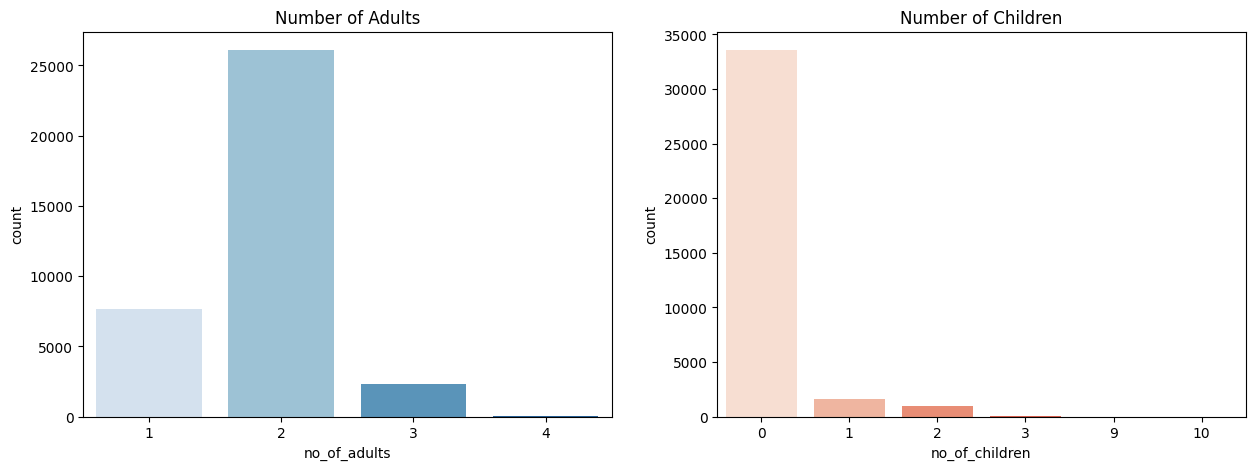

In [257]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(x='no_of_adults', data=df, ax=ax[0], palette='Blues')
ax[0].set_title('Number of Adults')
sns.countplot(x='no_of_children', data=df, ax=ax[1], palette='Reds')
ax[1].set_title('Number of Children')
plt.show()


These graphs shows the distribution of the guest information which includes number of adults and children. The majority of bookings were made for 2 adults with no children which could mean that most of the bookings were made for couples. The second most common booking was for 1 adult with no children which could mean that most of the bookings were made for business trips. A few bookings were made with 1 or  2 children which could be by a family.

**Time Spent at Hotel**

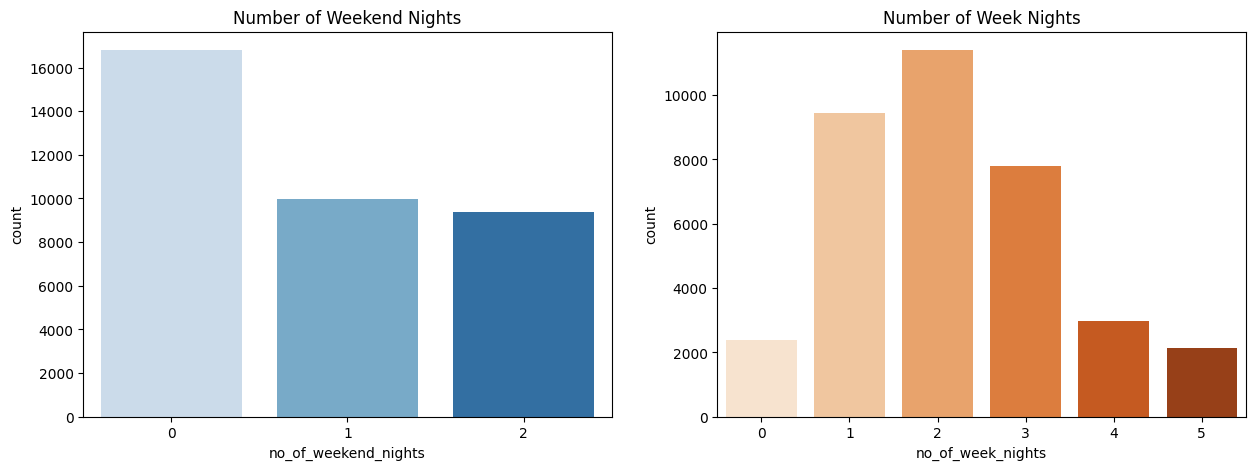

In [258]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(x='no_of_weekend_nights', data=df, ax=ax[0], palette='Blues')
ax[0].set_title('Number of Weekend Nights')
sns.countplot(x='no_of_week_nights', data=df, ax=ax[1], palette='Oranges')
ax[1].set_title('Number of Week Nights')
plt.show()

These graphs shows that most of the guest reserved to staye at the hotel on non weekend nights. The majority of the hotel bookings were for 1 or 2 nights. However, considerable number of bookings take place for the weekends. From this I assume that the bookings for the weekends were for vacation and the those for the weekdays were for business trips or for other reasons.

**Date of Arrival**

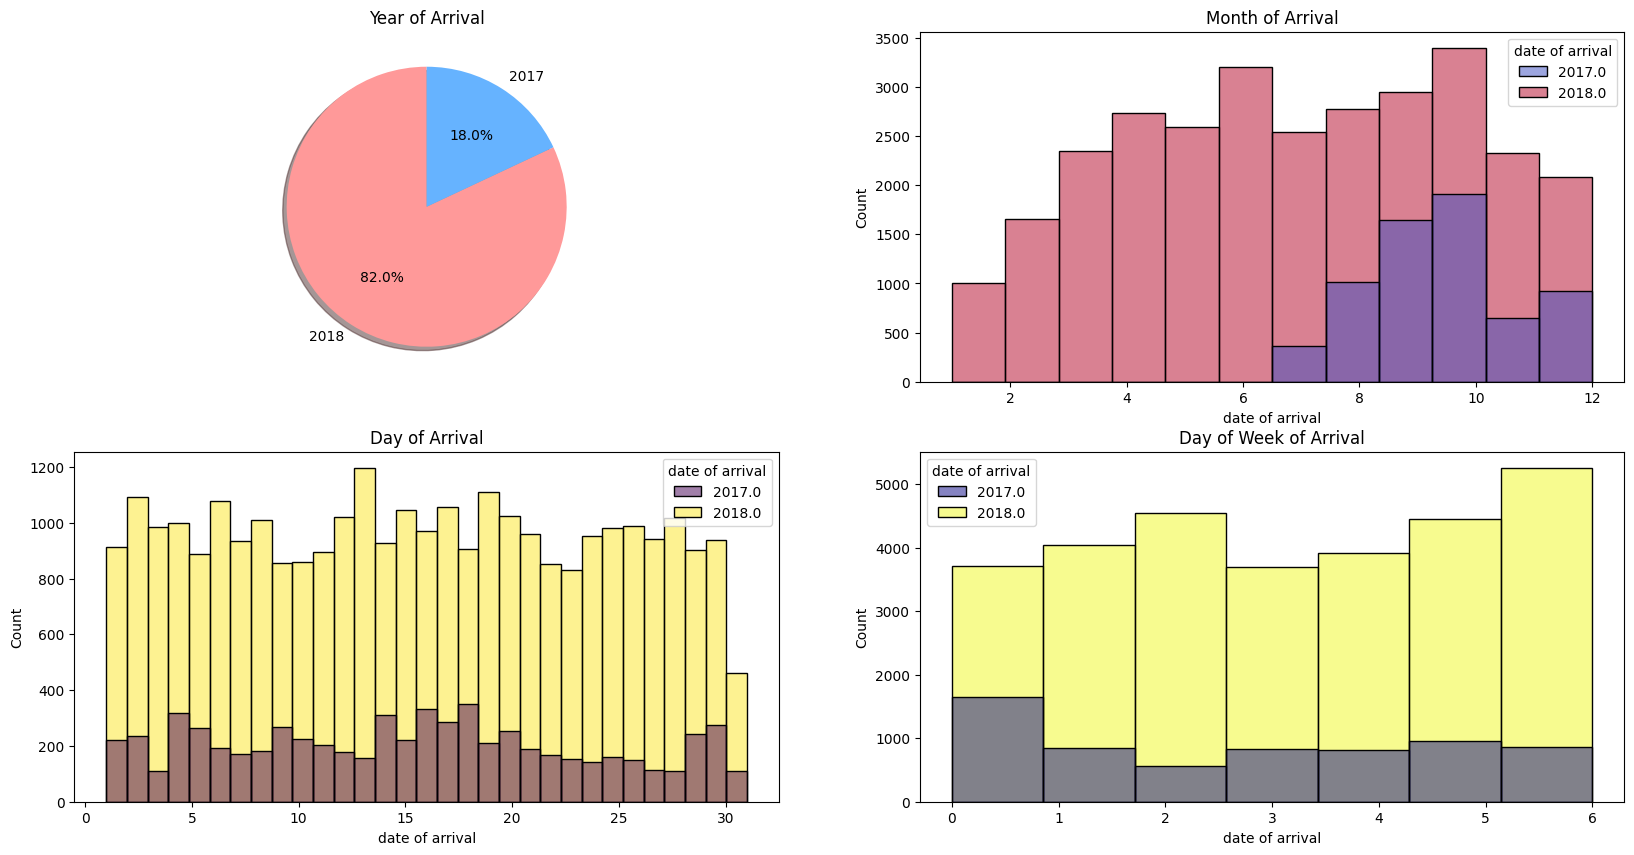

In [144]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10))

# Year of arrival (Pie Chart)
ax[0, 0].pie(df['date of arrival'].dt.year.value_counts(), 
             labels=[2018, 2017], autopct='%1.1f%%', 
             shadow=True, startangle=90, colors=['#ff9999', '#66b3ff'])
ax[0, 0].set_title('Year of Arrival')

# Month of arrival (Histogram)
sns.histplot(x=df['date of arrival'].dt.month, 
             ax=ax[0, 1], bins=12, hue=df['date of arrival'].dt.year, 
             palette='coolwarm').set_title('Month of Arrival')

# Day of arrival (Histogram)
sns.histplot(x=df['date of arrival'].dt.day, 
             ax=ax[1, 0], bins=31, hue=df['date of arrival'].dt.year, 
             palette='viridis').set_title('Day of Arrival')

# Day of week of arrival (Histogram)
sns.histplot(x=df['date of arrival'].dt.dayofweek, 
             ax=ax[1, 1], bins=7, hue=df['date of arrival'].dt.year, 
             palette='plasma').set_title('Day of Week of Arrival')

plt.show()

These graphs shows the number of bookings for the specific date, day, month and year. In the dataset, majority of the bookings were in 2018, i.e. 82%. In both the years the month of October had most booings as compared to other months. In 2017 nearly 2000 bookings in october and in 2018 nearly 3500. In addtion to that June had highest number of bookings after October. Coming to the days of the month, In 2017, 4,14,16,18 days from the month had the most reservations. In 2018, 2,7,14,19 days of the month had the most reservations. In the days of the week, Sundays had the highest number of reservations in 2017, whereas the Saturdays had the highest number of reservations in 2018.

From the above visualizations, I can conclude that more bookings were made in June and October particulary on the second and third weeks and during the weekends.

**All Services**

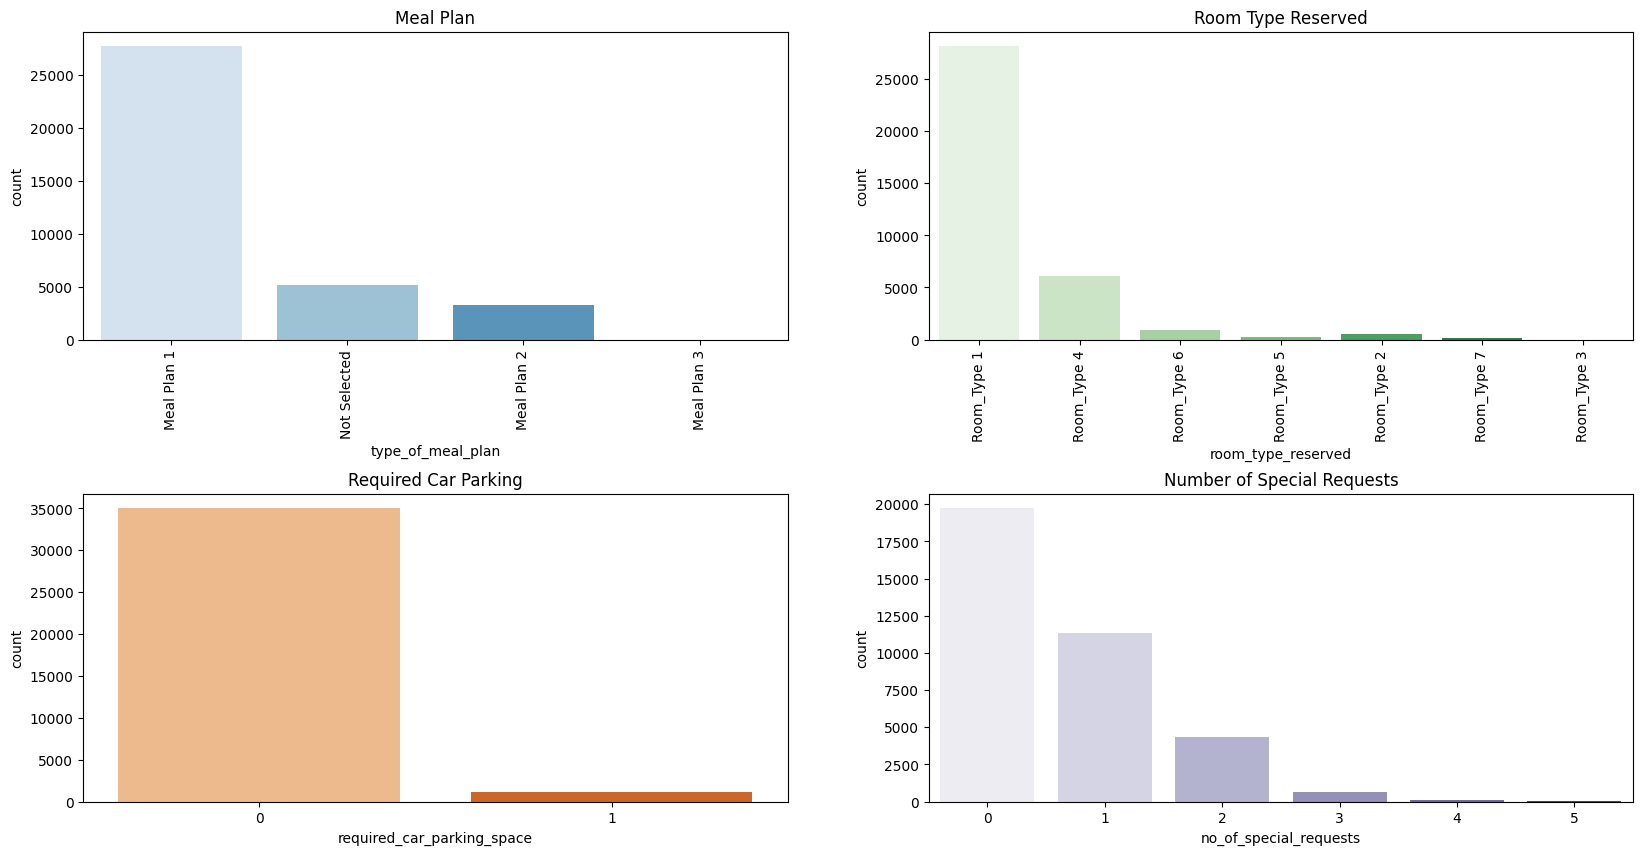

In [145]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
fig.subplots_adjust(hspace=0.5)

# Meal Plan
sns.countplot(x='type_of_meal_plan', data=df, ax=ax[0, 0], palette='Blues').set_title('Meal Plan')
ax[0, 0].xaxis.set_tick_params(rotation=90)

# Room Type Reserved
sns.countplot(x='room_type_reserved', data=df, ax=ax[0, 1], palette='Greens').set_title('Room Type Reserved')
ax[0, 1].xaxis.set_tick_params(rotation=90)

# Required Car Parking
sns.countplot(x='required_car_parking_space', data=df, ax=ax[1, 0], palette='Oranges').set_title('Required Car Parking')

# Number of Special Requests
sns.countplot(x='no_of_special_requests', data=df, ax=ax[1, 1], palette='Purples').set_title('Number of Special Requests')

plt.show()


The above graphs shows the type of services of the hotel taken by the guests during reservations. Majority of the guests preferred Meal Plan1 and Room Type 1 and no special requests during reservations and most of them don't require parking space. Moreover a significant number of reservations were made without specifiying the type of meal plan, which could mean that the guests might have meal outside the hotel. The required parking space graph also tells about the mode of transportation used by the guests. Most of the guests used public transport or taxi to reach the hotel.

**Lead time (days between date of reservation and date of arrival)**

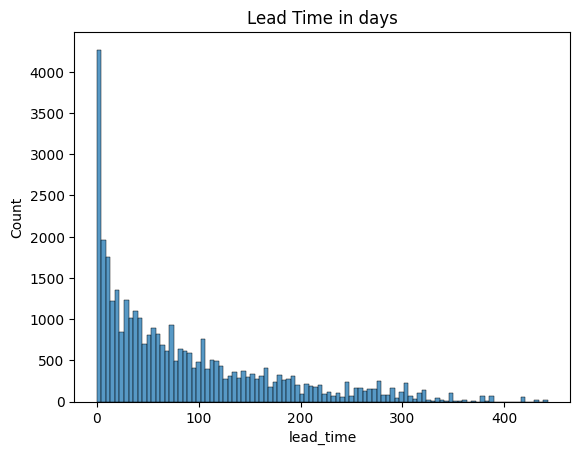

In [146]:
sns.histplot(x = 'lead_time', data = df, bins=100).set_title('Lead Time in days')
plt.show()

The histogram shows that most lead times are very short, with many events happening within a few days. As the lead time increases, the number of events quickly drops off, but there are still some events that take a very long time, up to around 400 days. Overall, short lead times are much more common than long ones.

**Market Segment**

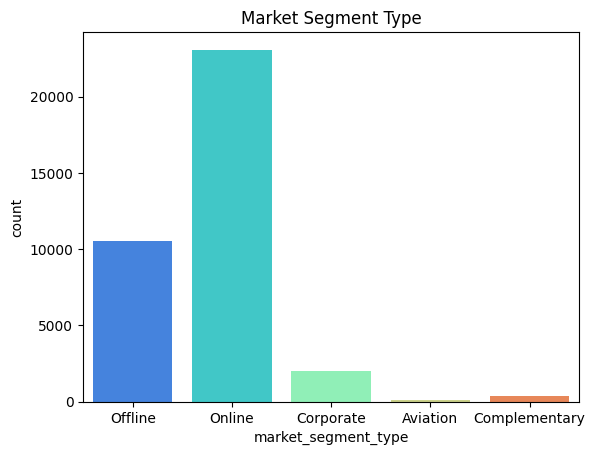

In [147]:
sns.countplot(x='market_segment_type', data=df, palette="rainbow").set_title('Market Segment Type')
plt.show()

This graph shows the major gateways through which reservations were made at the hotel. Makority of the reservations were made through online platforms which means the hotel company has more presence on travel booking platforms. The second most common way of booking was through offline, which could be on arrival at the hotel or through a travel agent. The third most common way of booking was corporate, which could be through a company. Vert few of the bookings were made by aviation companies which highlights possibility of an airport near the hotel.

**Guest's previous experience with the hotel**

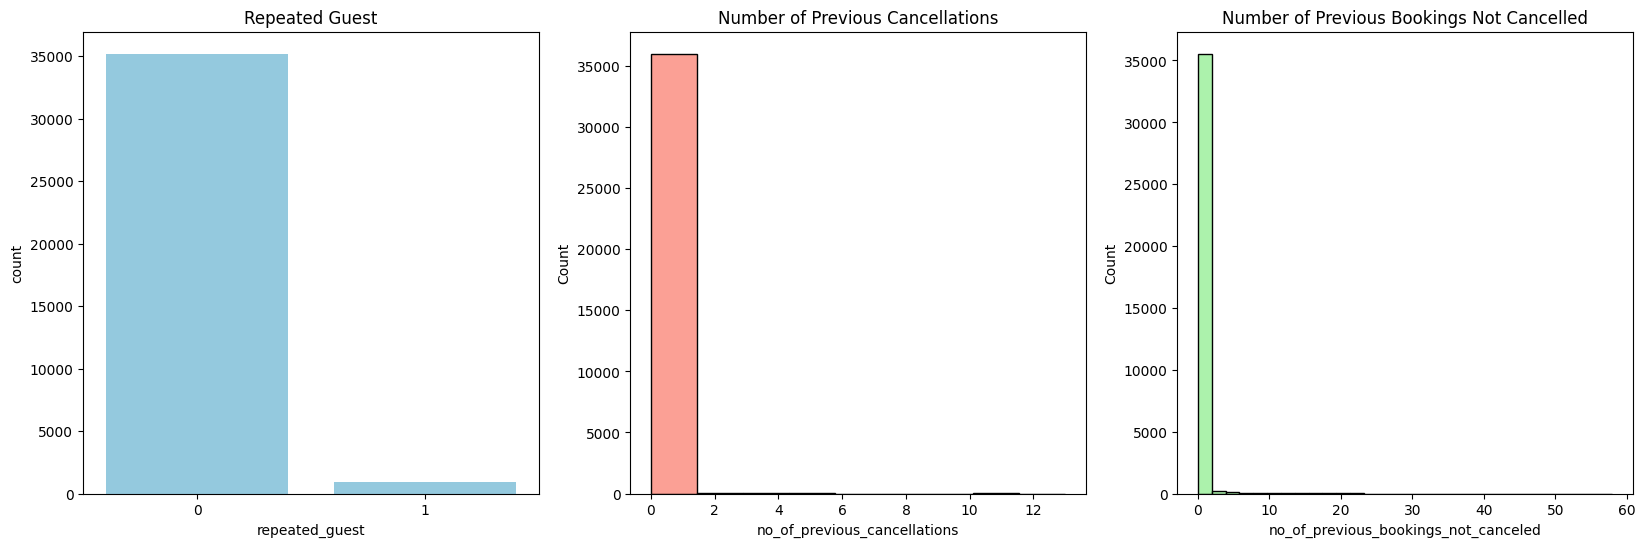

In [148]:
fig, ax = plt.subplots(1, 3, figsize=(20, 6))

sns.countplot(x='repeated_guest', data=df, ax=ax[0], color='skyblue').set_title('Repeated Guest')

sns.histplot(x='no_of_previous_cancellations', data=df, ax=ax[1], bins=9, color='salmon').set_title('Number of Previous Cancellations')

sns.histplot(x='no_of_previous_bookings_not_canceled', data=df, ax=ax[2], bins=30, color='lightgreen').set_title('Number of Previous Bookings Not Cancelled')

plt.show()

Majority of the reservations made at the hotel are by new guest, very few are the repeated guests at the hotel. This highlights the problem in the customer retention at the hotel. The hotel should focus on providing better services to the guests so that they would like to visit the hotel again. Since majority of the guest are new, so majority of the dataset has 0 pervious bookings cancellation. However, on a little bit closer look, we can see that there some guests who have cancelled their previous bookings. 

**Average room price**

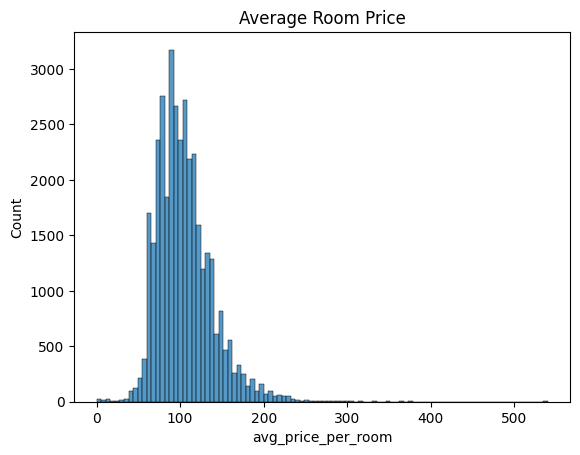

In [149]:
sns.histplot(x = 'avg_price_per_room', data = df, bins = 100).set_title('Average Room Price')
plt.show()

This graph shows the distribution of the room price. Majority of the reservations made had room price between 75 to 150. Very few of the reservations had room price more than 200.

**Impact of Lead Time on Cancellation Rates**

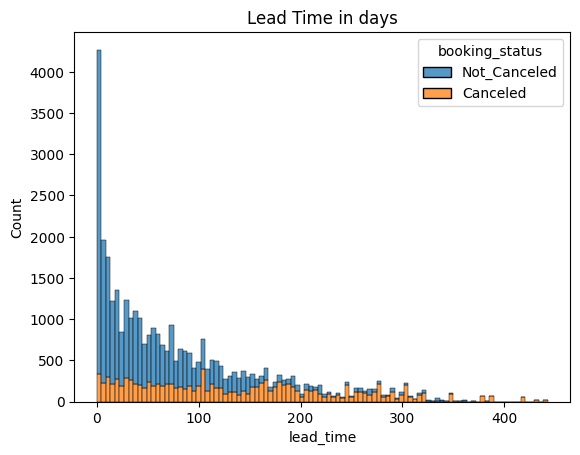

In [150]:
sns.histplot(x = 'lead_time', data = df, bins=100, hue = 'booking_status', multiple = 'stack').set_title('Lead Time in days')
plt.show()

The histogram shows that most bookings have short lead times, with a significant number of "Not Canceled" bookings occurring within a few days. As the lead time increases, the number of bookings, both "Not Canceled" and "Canceled," decreases rapidly. "Canceled" bookings are less frequent overall but follow a similar pattern, with most cancellations happening within a shorter lead time. Longer lead times are less common for both categories, but there are still some bookings and cancellations that occur up to around 400 days.

**Guest Information and Cancellation**

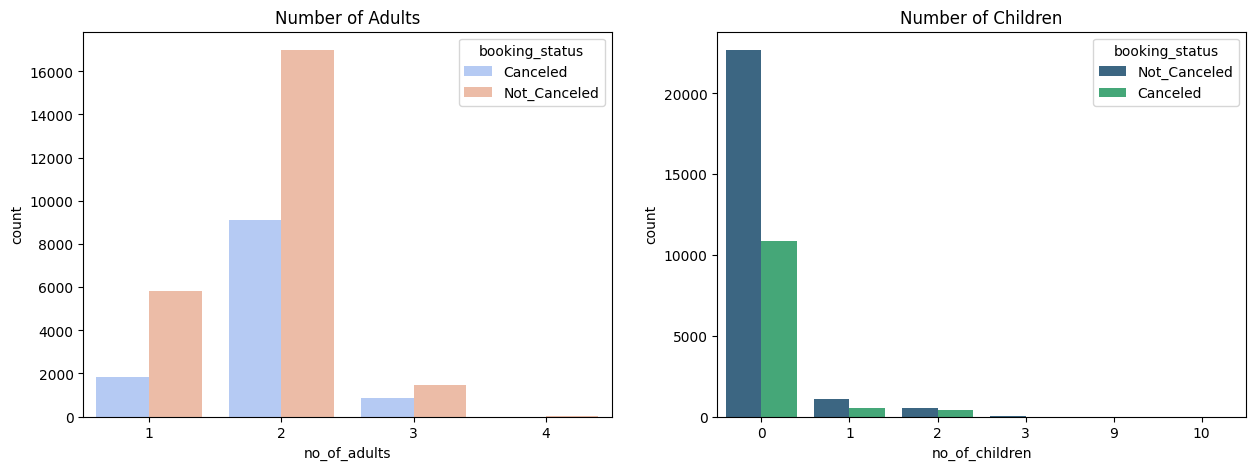

In [151]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(x='no_of_adults', data=df, ax=ax[0], hue='booking_status', palette='coolwarm').set_title('Number of Adults')
sns.countplot(x='no_of_children', data=df, ax=ax[1], hue='booking_status', palette='viridis').set_title('Number of Children')
plt.show()

The bar charts show that most bookings are for two adults, with a significantly higher number of "Not Canceled" bookings compared to "Canceled" ones. Bookings for one adult are also common, but much less so than for two adults. Bookings for three or more adults are rare. For children, the majority of bookings include no children, with "Not Canceled" bookings being much more frequent than "Canceled" ones. Bookings with one or two children are less common, and bookings with more than two children are very rare. Overall, bookings tend to be for two adults with no children, and cancellations are less frequent across all categories.

**Influence of Market Segment & Repeated Guests on Cancellation**

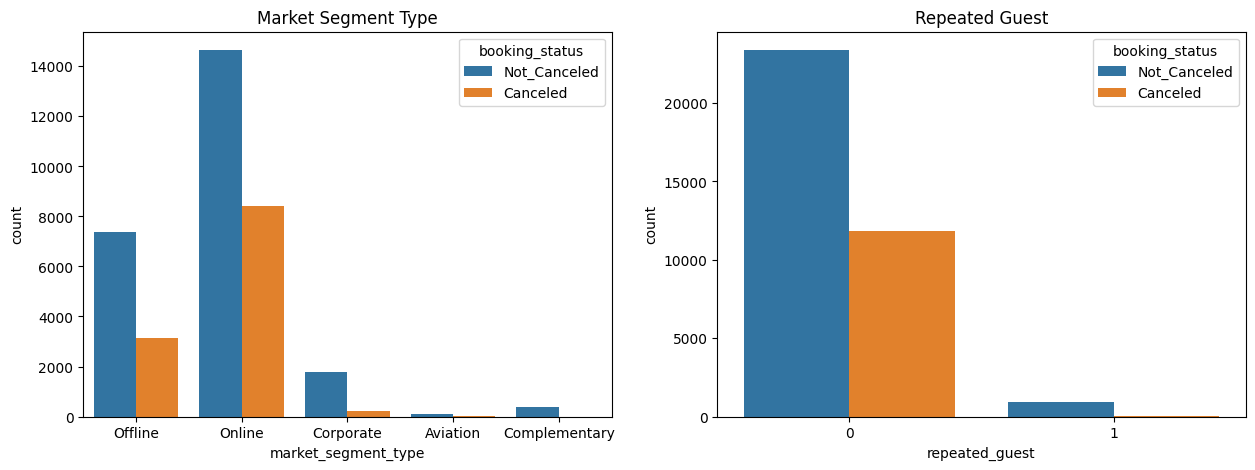

In [152]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(x ='market_segment_type', data=df,ax=ax[0], hue = 'booking_status').set_title('Market Segment Type')
sns.countplot(x ='repeated_guest', data=df,ax=ax[1], hue = 'booking_status').set_title('Repeated Guest')
plt.show()

The bar charts show that most bookings come from the "Online" market segment, with a significantly higher number of "Not Canceled" bookings compared to "Canceled" ones. "Offline" bookings are also common but less frequent than online bookings. Other market segments like "Corporate," "Aviation," and "Complementary" have very few bookings. Additionally, most guests are not repeat visitors, as indicated by the high count of bookings with "repeated_guest" marked as 0, with "Not Canceled" bookings being more frequent than "Canceled" ones. Repeat guests (marked as 1) are much less common.

**Effect of Booking Timing (Weekdays vs. Weekends) on Cancellations**

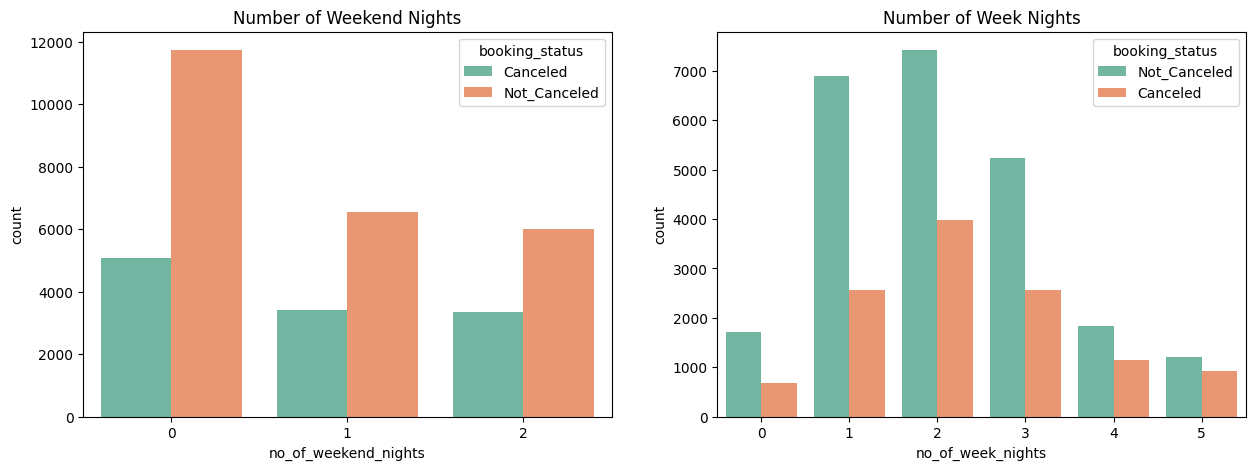

In [153]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(x='no_of_weekend_nights', data=df, ax=ax[0], hue='booking_status', palette='Set2').set_title('Number of Weekend Nights')
sns.countplot(x='no_of_week_nights', data=df, ax=ax[1], hue='booking_status', palette='Set2').set_title('Number of Week Nights')
plt.show()

These graphs reveal interesting facts about reservation cancellation. The reservations made to spend 1 or 2 weekends nights have lower count of being cancelled. As compared to the reservations made to spend 2 weekdays at the hotel had the highest cancellation count followed by 1 and 3 week days. This could mean that guest could cancel their reservation, if they were palnning to stay during the week days and for less than 3 days. However, this count is lower, when reservations are made for weekends.

**Date of Arrival and Cancellation**

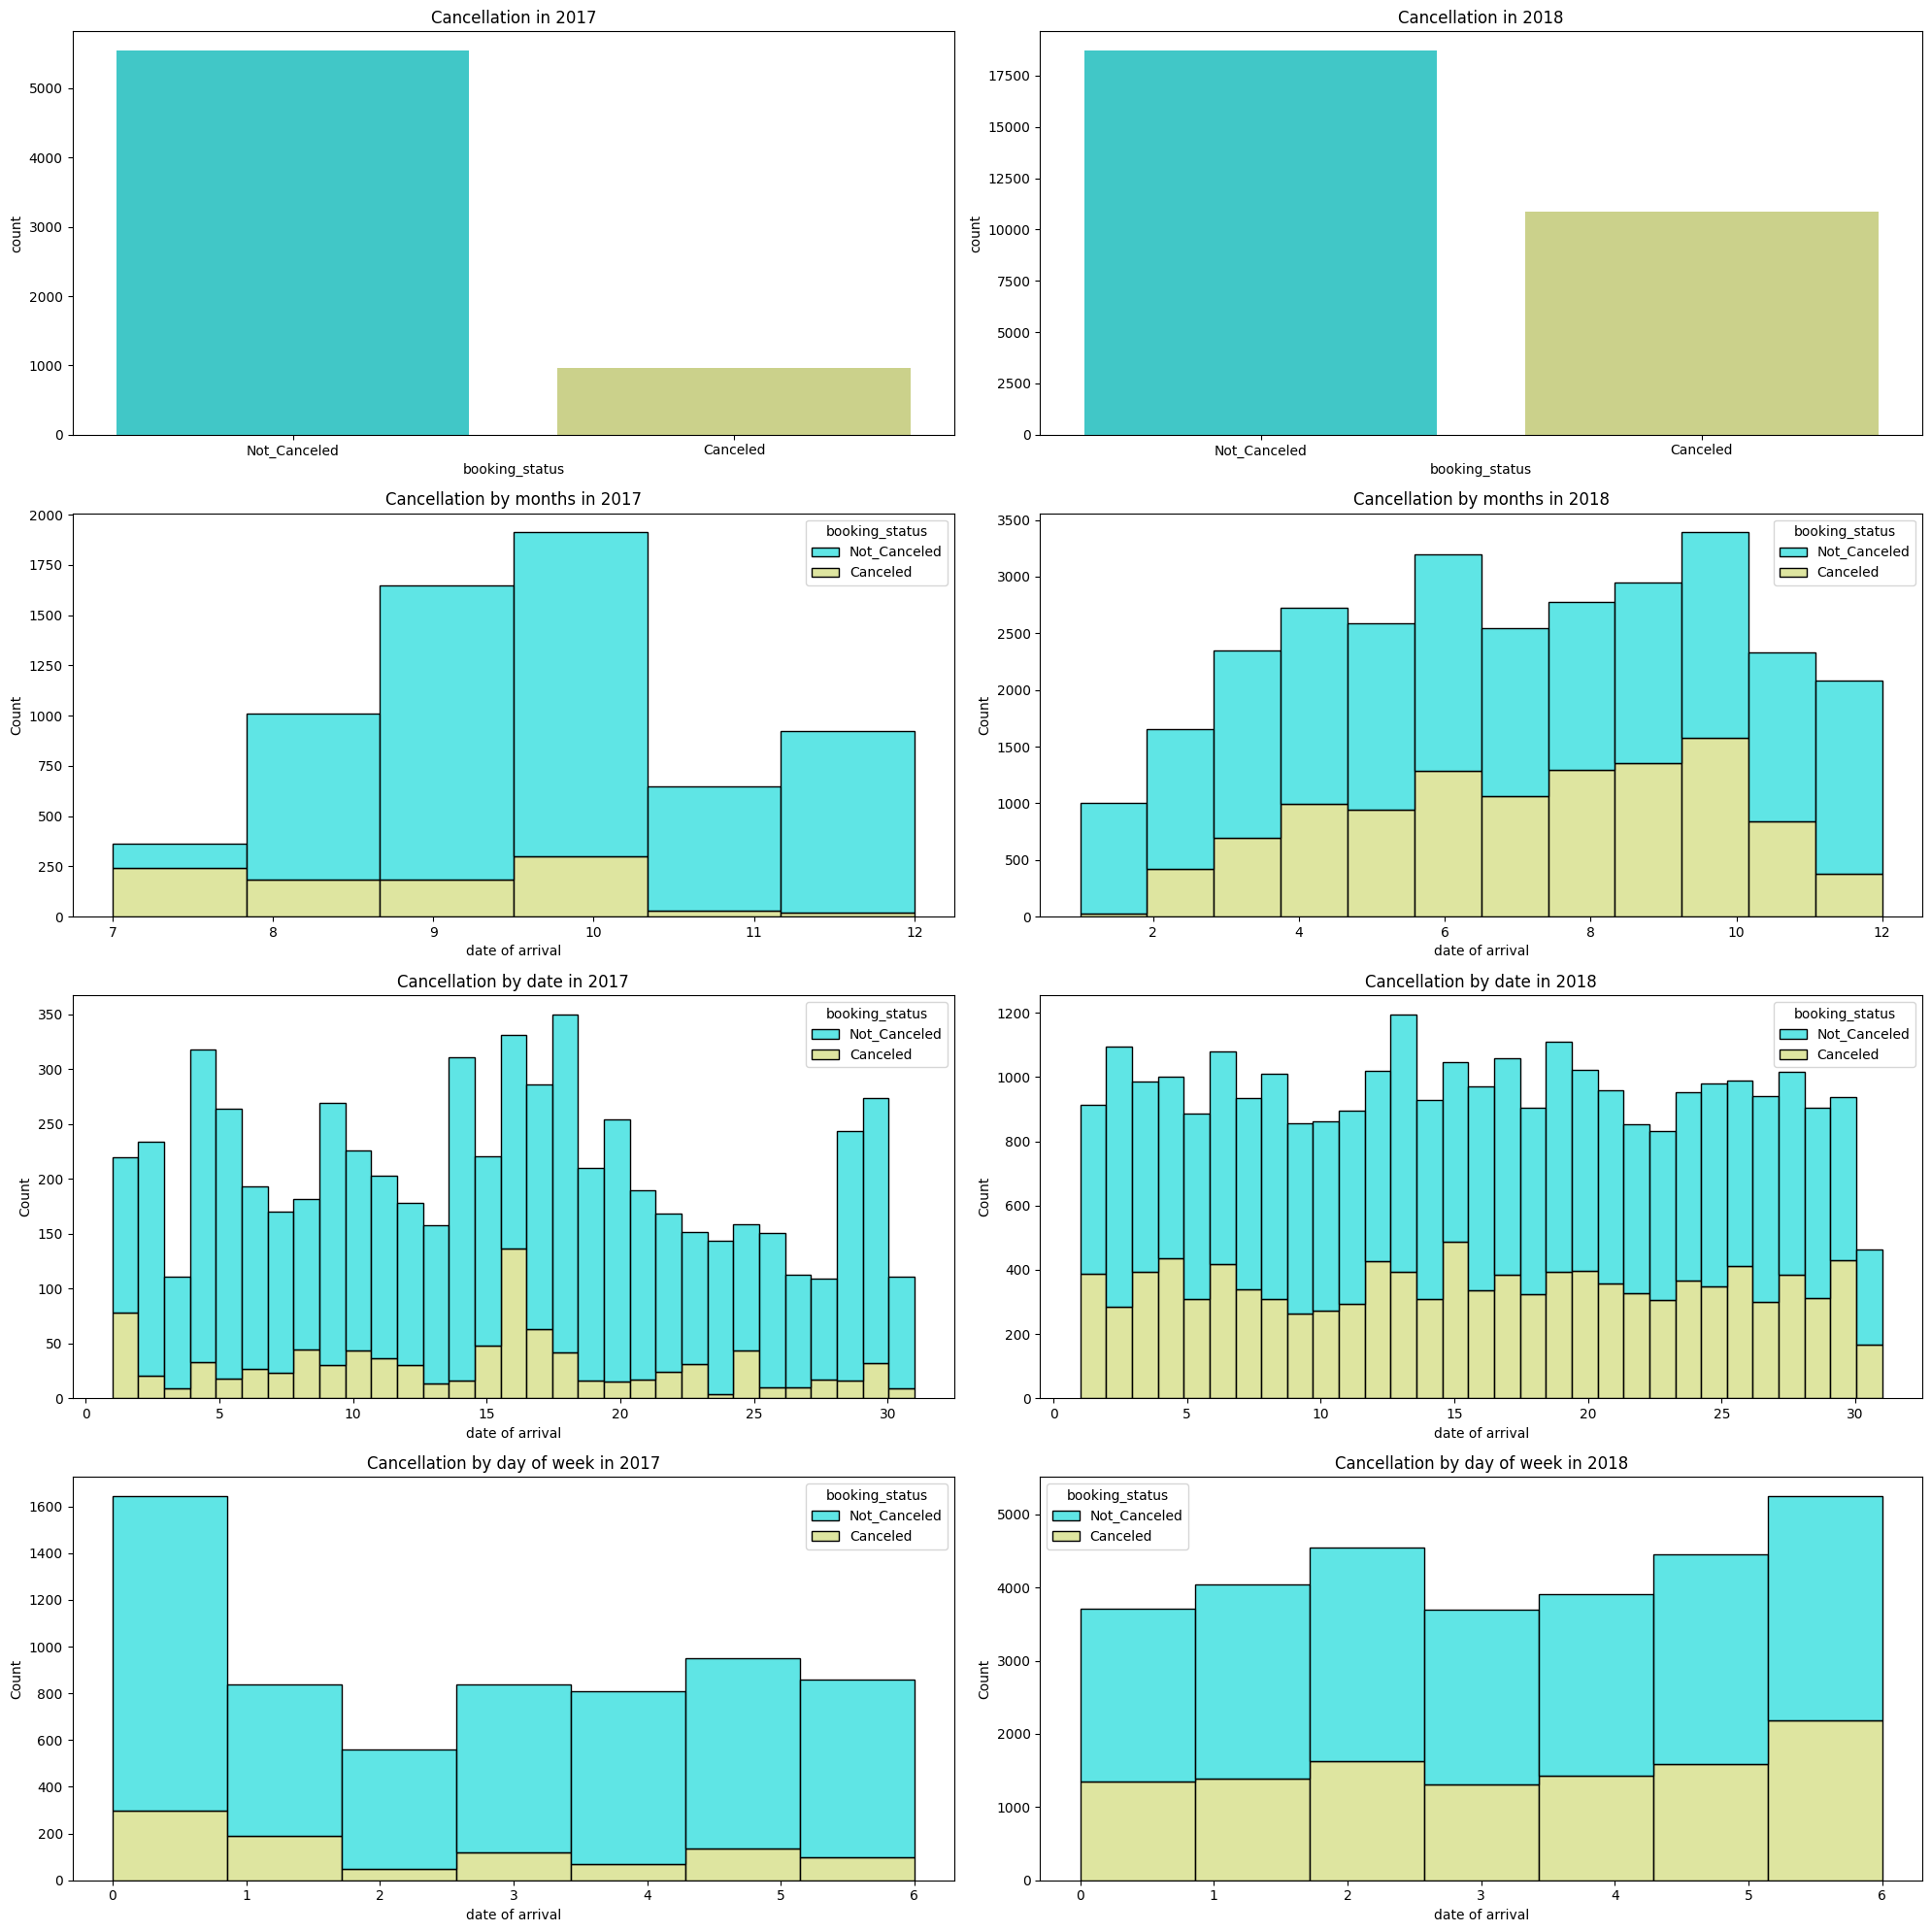

In [154]:
fig, ax = plt.subplots(4, 2, figsize=(20, 20))
df_2017 = df[df['date of arrival'].dt.year == 2017]
df_2018 = df[df['date of arrival'].dt.year == 2018]

# Year-wise
sns.countplot(x='booking_status', data=df_2017, ax=ax[0, 0], palette='rainbow').set_title('Cancellation in 2017')
sns.countplot(x='booking_status', data=df_2018, ax=ax[0, 1], palette='rainbow').set_title('Cancellation in 2018')

# Month-wise
sns.histplot(x=df_2017['date of arrival'].dt.month, data=df_2017, ax=ax[1, 0], bins=6, hue='booking_status', palette='rainbow', multiple='stack').set_title('Cancellation by months in 2017')
sns.histplot(x=df_2018['date of arrival'].dt.month, data=df_2018, ax=ax[1, 1], bins=12, hue='booking_status', palette='rainbow', multiple='stack').set_title('Cancellation by months in 2018')

# Date-wise
sns.histplot(x=df_2017['date of arrival'].dt.day, data=df_2017, ax=ax[2, 0], bins=31, hue='booking_status', palette='rainbow', multiple='stack').set_title('Cancellation by date in 2017')
sns.histplot(x=df_2018['date of arrival'].dt.day, data=df_2018, ax=ax[2, 1], bins=31, hue='booking_status', palette='rainbow', multiple='stack').set_title('Cancellation by date in 2018')

# Day of week-wise
sns.histplot(x=df_2017['date of arrival'].dt.dayofweek, data=df_2017, ax=ax[3, 0], bins=7, hue='booking_status', palette='rainbow', multiple='stack').set_title('Cancellation by day of week in 2017')
sns.histplot(x=df_2018['date of arrival'].dt.dayofweek, data=df_2018, ax=ax[3, 1], bins=7, hue='booking_status', palette='rainbow', multiple='stack').set_title('Cancellation by day of week in 2018')

plt.tight_layout()
plt.show()

The above graphs visualizes the reservation cancellation based on the dates the reservations were made. As we know that dataset mostly has reservations from 2018, despite of that, the number of reservations cancelled in 2018 is way higher than 2017. In 2017, nearly 5500 reservations were not cancelled and nearly 1000 where cancelled. However in 2018, 17500 reservations were not cancelled and more than 10000 reservations were cancelled. This shows that rate of reservation cancellation was much higher in 2018

Coming to the reservation cancellation according to the months, in 2017 reservations made in July and October had the highest. In addtion to that July had the least number of reservations made but still it has highest cancellation, which points some particular reason, not specified by the data. In 2018, June and October had the highest number of reservations made.

Now, we will look at the reservation cancellations by date of the month. In 2017, most reservations were cancelled for 16th and peculiarly on 1st of the month. In 2018, the number of cancellations were more in second and first week.

Coming to the day wise cancellation, in 2017 Sundays had the highest number of cancellations. In 2018, Saturdays had the highest number of cancellations.

**Services and Cancellation**

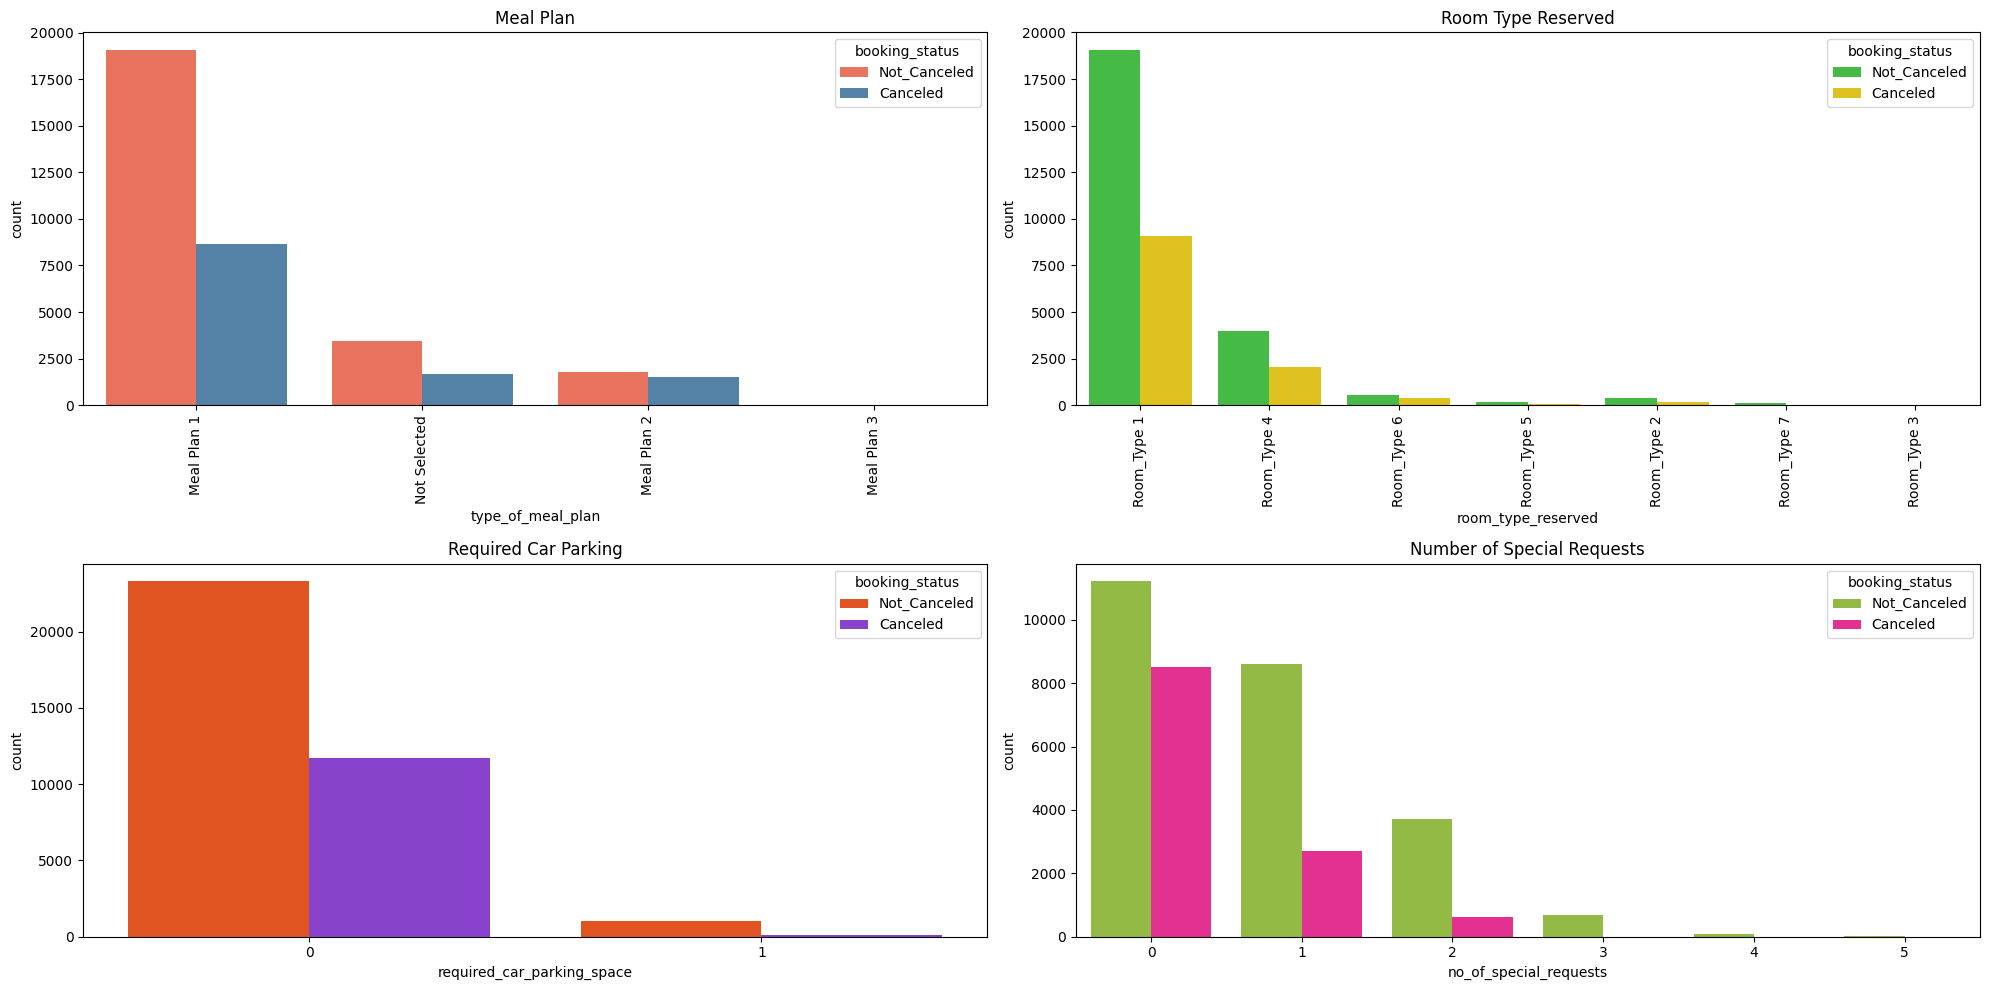

In [155]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
fig.subplots_adjust(hspace=0.5)

sns.countplot(x='type_of_meal_plan', data=df, ax=ax[0, 0], hue='booking_status', palette=['#FF6347', '#4682B4']).set_title('Meal Plan')
ax[0, 0].xaxis.set_tick_params(rotation=90)

sns.countplot(x='room_type_reserved', data=df, ax=ax[0, 1], hue='booking_status', palette=['#32CD32', '#FFD700']).set_title('Room Type Reserved')
ax[0, 1].xaxis.set_tick_params(rotation=90)

sns.countplot(x='required_car_parking_space', data=df, ax=ax[1, 0], hue='booking_status', palette=['#FF4500', '#8A2BE2']).set_title('Required Car Parking')

sns.countplot(x='no_of_special_requests', data=df, ax=ax[1, 1], hue='booking_status', palette=['#9ACD32', '#FF1493']).set_title('Number of Special Requests')

plt.tight_layout()
plt.show()

In the above graphs, we can see that the ratio of cancelled and not cancelled reservations is almost same for all the services. Therefore, I can conclude that the services provided by the hotel does not have any impact on the reservation cancellation.

**Average room price and Cancellation**

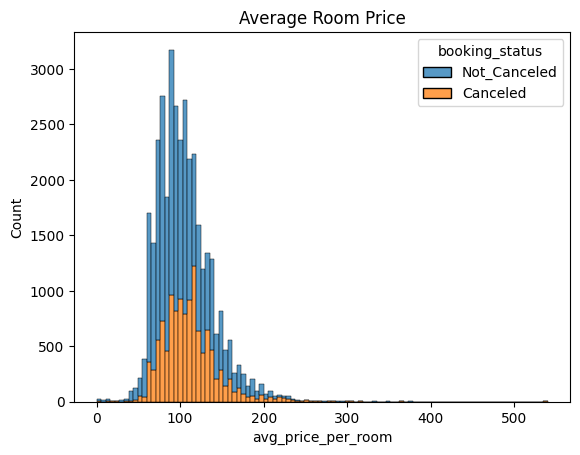

In [156]:
sns.histplot(x = 'avg_price_per_room', data = df, bins = 100, hue = 'booking_status', multiple = 'stack').set_title('Average Room Price')
plt.show()

Most of the room prices are between 75-150 and the number of reservations cancellation mostly occur in the same range. Therefore, there is no relation between the room price and reservation cancellation.

**Outlier Removal using IQR**

In [157]:
#columns for outlier removal
cols = ['lead_time', 'avg_price_per_room']

Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

#removing outliers
df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

_Step 5 : Feature Engineering_
-

**Label Encoding**

In [158]:
#label encoding object
le = LabelEncoder()

#columns to be encoded
cols = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status']

#label encoding
for col in cols:
    le.fit(df[col])
    df[col] = le.transform(df[col])
    print(col, df[col].unique())

type_of_meal_plan [0 3 1 2]
room_type_reserved [0 3 5 4 1 6 2]
market_segment_type [3 4 2 0 1]
booking_status [1 0]


**Feature Scaling**

In [159]:
#standardizing the data
scaler = StandardScaler()
df[['lead_time', 'avg_price_per_room']] = scaler.fit_transform(df[['lead_time', 'avg_price_per_room']])

**Correlation Matrix**

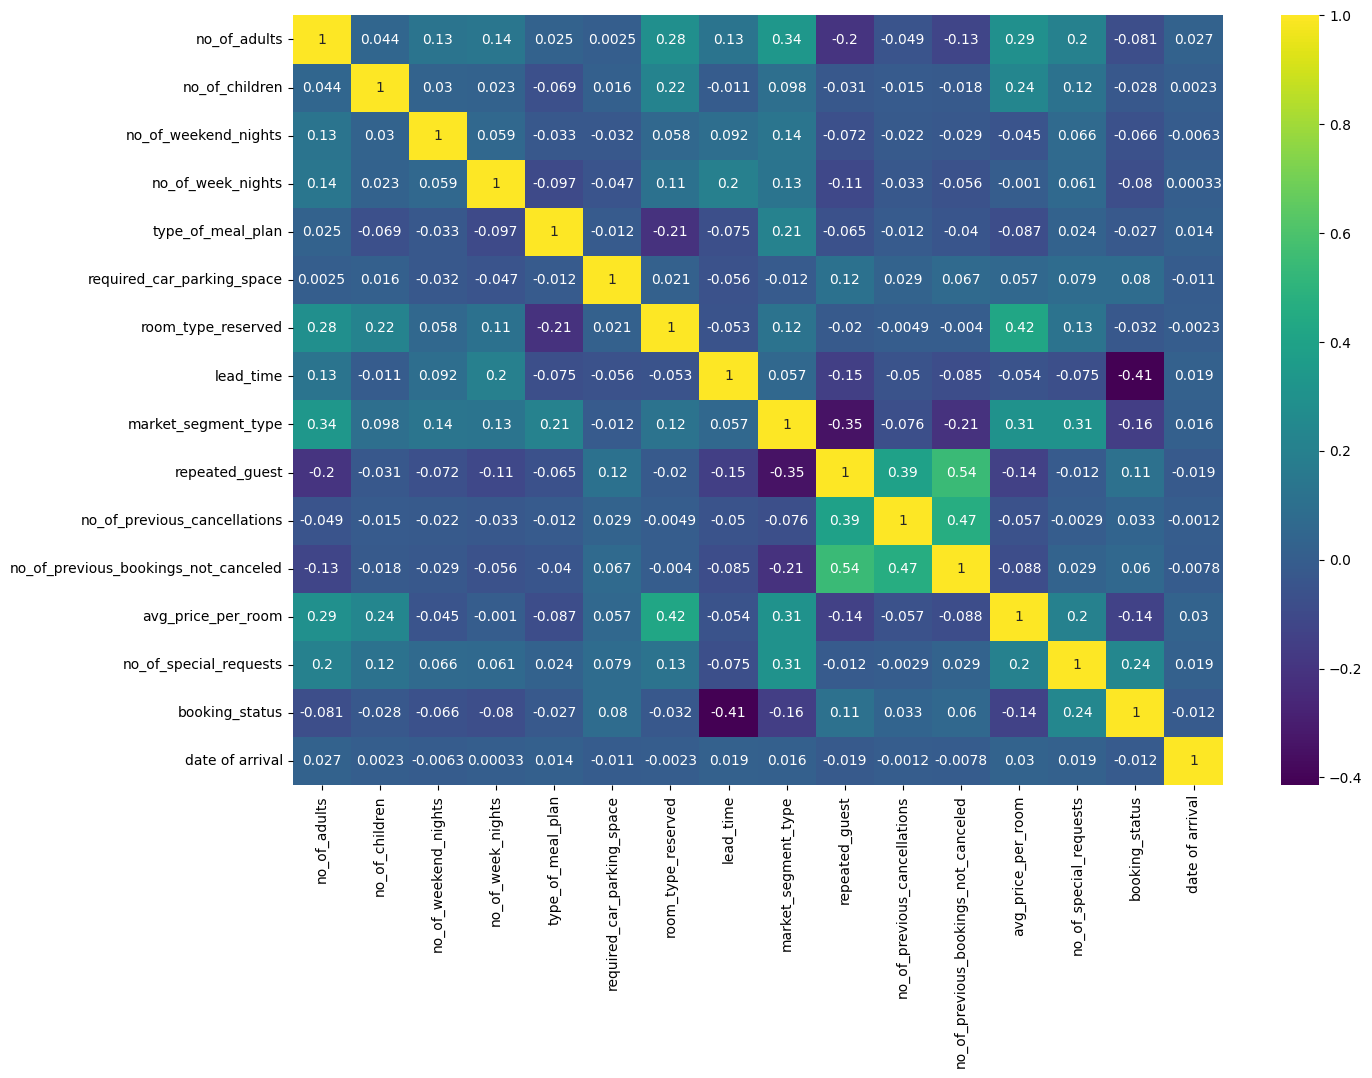

In [160]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.show()

In [161]:
# Having issue with the model training due to this column
df.drop(columns=['date of arrival'], inplace=True)

**_Split Data into Train and test_**

In [162]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(df.drop('booking_status', axis=1), df['booking_status'], test_size=0.2, random_state=42)

_Step 6 : Model Building_
-
1. Logistic Regression
2. Decision Tree Classifier
3. Random Forest Classifier

**1. Logistic Regression**

In [163]:
# Initialize Logistic Regression model
LR = LogisticRegression()

_Logistic Regression using GridSearchCV_

In [164]:
# Grid search parameters
grid_param = {
    'C': [0.001,0.01,0.1,1,10,100,1000],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'random_state' : [0,42]
}

# Grid search object
grid_search = GridSearchCV(estimator=LR, param_grid=grid_param, cv=5, n_jobs=-1, scoring='accuracy')

# Fitting the grid search object to the training data
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters found by GridSearchCV:", grid_search.best_params_)

Best parameters found by GridSearchCV: {'C': 10, 'penalty': 'l2', 'random_state': 0, 'solver': 'newton-cg'}


In [165]:
# Logistic regression classifier object with best parameters
best_LR = LogisticRegression(C=10, penalty='l2', random_state=0, solver='newton-cg')

# Evaluate the best model using cross_val_score
cv_scores = cross_val_score(best_LR, X_train, y_train, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

# Training the model with the best parameters
best_LR.fit(X_train, y_train)

# Training accuracy
print("Training accuracy:", best_LR.score(X_train, y_train))

# Predicting the test set results
LR_pred = best_LR.predict(X_test)


Cross-validation scores: [0.79873747 0.78941504 0.79461467 0.79201486 0.8       ]
Mean cross-validation score: 0.794956407150696
Training accuracy: 0.7947708534501968


**2. Decision Tree**

In [166]:
# Initialize DecisionTreeClassifier model
DT = DecisionTreeClassifier()

_Decision Tree using GridSearchCV_

In [167]:
# Grid search parameters
grid_param = {
    'max_depth': [3, 5, 7, 9, 11],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'min_samples_split': [2, 4, 6, 8, 10],
    'criterion': ['gini', 'entropy'],
    'random_state': [0, 42]
}

# Grid search object
grid_search = GridSearchCV(estimator=DT, param_grid=grid_param, cv=5, n_jobs=-1, scoring='accuracy')

# Fitting the grid search object to the training data
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters found by GridSearchCV:", grid_search.best_params_)

Best parameters found by GridSearchCV: {'criterion': 'entropy', 'max_depth': 11, 'min_samples_leaf': 1, 'min_samples_split': 6, 'random_state': 0}


In [168]:
# Decision tree classifier object with best parameters
best_DT = DecisionTreeClassifier(criterion='entropy', max_depth=11, min_samples_leaf=1, min_samples_split=6, random_state=0)

# Evaluate the best model using cross_val_score
cv_scores = cross_val_score(best_DT, X_train, y_train, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

# Training the model with the best parameters
best_DT.fit(X_train, y_train)

# Training accuracy
print("Training accuracy:", best_DT.score(X_train, y_train))

# Predicting the test set results
DT_pred = best_DT.predict(X_test)

Cross-validation scores: [0.86669142 0.87000929 0.86072423 0.85143918 0.86035283]
Mean cross-validation score: 0.8618433912192309
Training accuracy: 0.8811186214068187


**3. Random Forest**

In [171]:
# Initialize RandomForestClassifier model
RF = RandomForestClassifier()

_Random Forest using GridSearchCV_

In [173]:
# Grid search parameters
grid_param = {
    'n_estimators': [5, 10],
    'max_depth': [None, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False],
    'random_state': [0,42],
    'criterion': ['gini', 'entropy']
}

# Grid search object
grid_search = GridSearchCV(estimator=RF, param_grid=grid_param, cv=5, n_jobs=-1, scoring='accuracy')

# Fitting the grid search object to the training data
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters found by GridSearchCV:", grid_search.best_params_)

Best parameters found by GridSearchCV: {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 10, 'random_state': 0}


In [175]:
# Random forest classifier object with best parameters
best_RF = RandomForestClassifier(bootstrap=False,criterion='gini',max_depth=None,min_samples_leaf=2,min_samples_split=2,n_estimators=10,random_state=0)

# Evaluate the best model using cross_val_score
cv_scores = cross_val_score(best_RF, X_train, y_train, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

# Training the model with the best parameters
best_RF.fit(X_train, y_train)

# Training accuracy
print("Training accuracy:", best_RF.score(X_train, y_train))

# Predicting the test set results
RF_pred = best_RF.predict(X_test)

Cross-validation scores: [0.88637208 0.88430826 0.87502321 0.87483751 0.87409471]
Mean cross-validation score: 0.8789271542404549
Training accuracy: 0.9635668127460447


_Model Evaluation_
-

**Confusion Matrix**

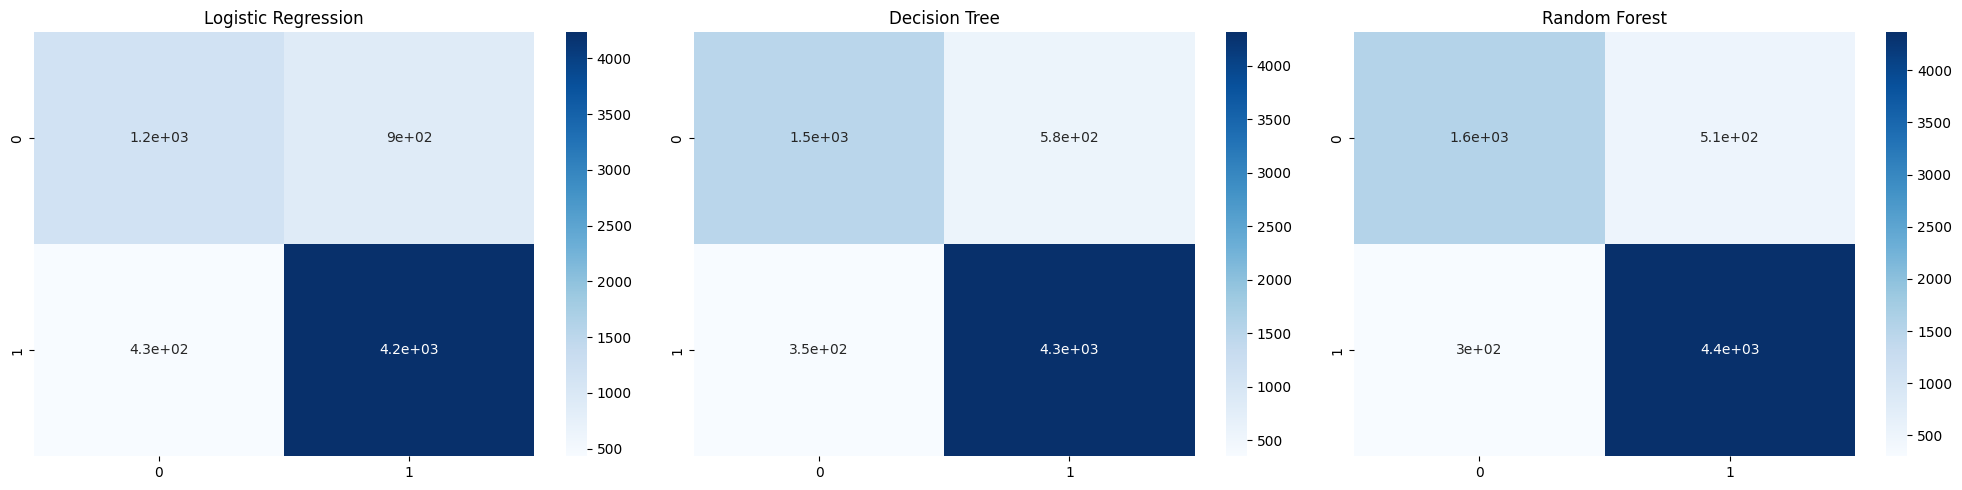

In [182]:
# List of models and their predictions
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
predictions = [LR_pred, DT_pred, RF_pred]

# Create a figure with 3 subplots
fig, ax = plt.subplots(1, 3, figsize=(20, 5))

# Loop through models and their predictions to plot confusion matrices
for i, (model, pred) in enumerate(zip(models, predictions)):
    cm = confusion_matrix(y_test, pred)
    sns.heatmap(cm, annot=True, cmap='Blues', ax=ax[i]).set_title(model)

# Display the plot
plt.tight_layout()
plt.show()

**Classification Report**

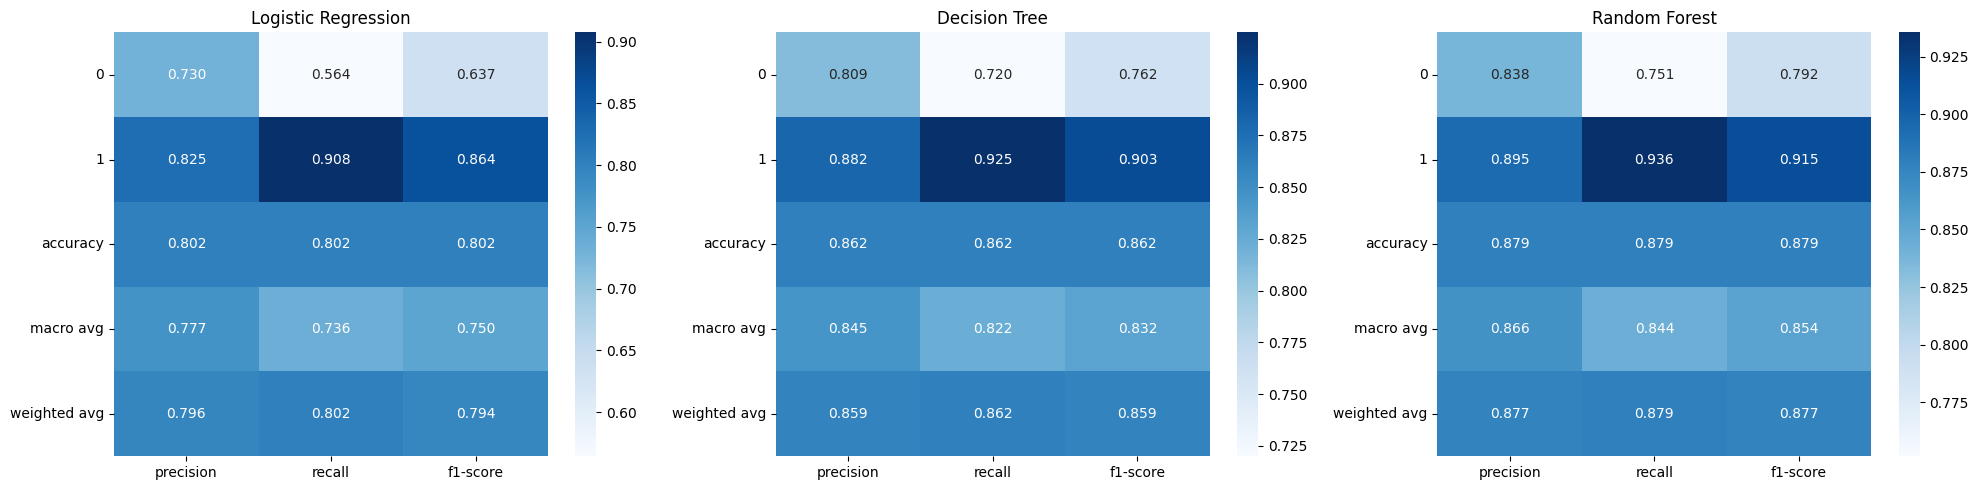

In [185]:
# Function to plot classification report as a heatmap
def plot_classification_report(y_true, y_pred, title, ax):
    report = classification_report(y_true, y_pred, output_dict=True)
    cr = pd.DataFrame(report).T.drop(columns='support')
    sns.heatmap(cr, annot=True, cmap='Blues', fmt='.3f', ax=ax)
    ax.set_title(title)

# Create a figure with 3 subplots
fig, ax = plt.subplots(1, 3, figsize=(20, 5))

# Plot Logistic Regression classification report
plot_classification_report(y_test, LR_pred, 'Logistic Regression', ax[0])

# Plot Decision Tree classification report
plot_classification_report(y_test, DT_pred, 'Decision Tree', ax[1])

# Plot Random Forest classification report
plot_classification_report(y_test, RF_pred, 'Random Forest', ax[2])

# Display the plot
plt.tight_layout()
plt.show()

**Model Metrics**

In [189]:
#logistic regression
print('Logistic Regression')
print('Accuracy Score: ', accuracy_score(y_test, LR_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, LR_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, LR_pred))

print('\n')

#decision tree
print('Decision Tree')
print('Accuracy Score: ', accuracy_score(y_test, DT_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, DT_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, DT_pred))

print('\n')

#random forest
print('Random Forest')
print('Accuracy Score: ', accuracy_score(y_test, RF_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, RF_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, RF_pred))

Logistic Regression
Accuracy Score:  0.8021390374331551
Mean Absolute Error:  0.19786096256684493
Mean Squared Error:  0.19786096256684493


Decision Tree
Accuracy Score:  0.8618538324420677
Mean Absolute Error:  0.13814616755793227
Mean Squared Error:  0.13814616755793227


Random Forest
Accuracy Score:  0.8790849673202614
Mean Absolute Error:  0.12091503267973856
Mean Squared Error:  0.12091503267973856


**Model Comparison**

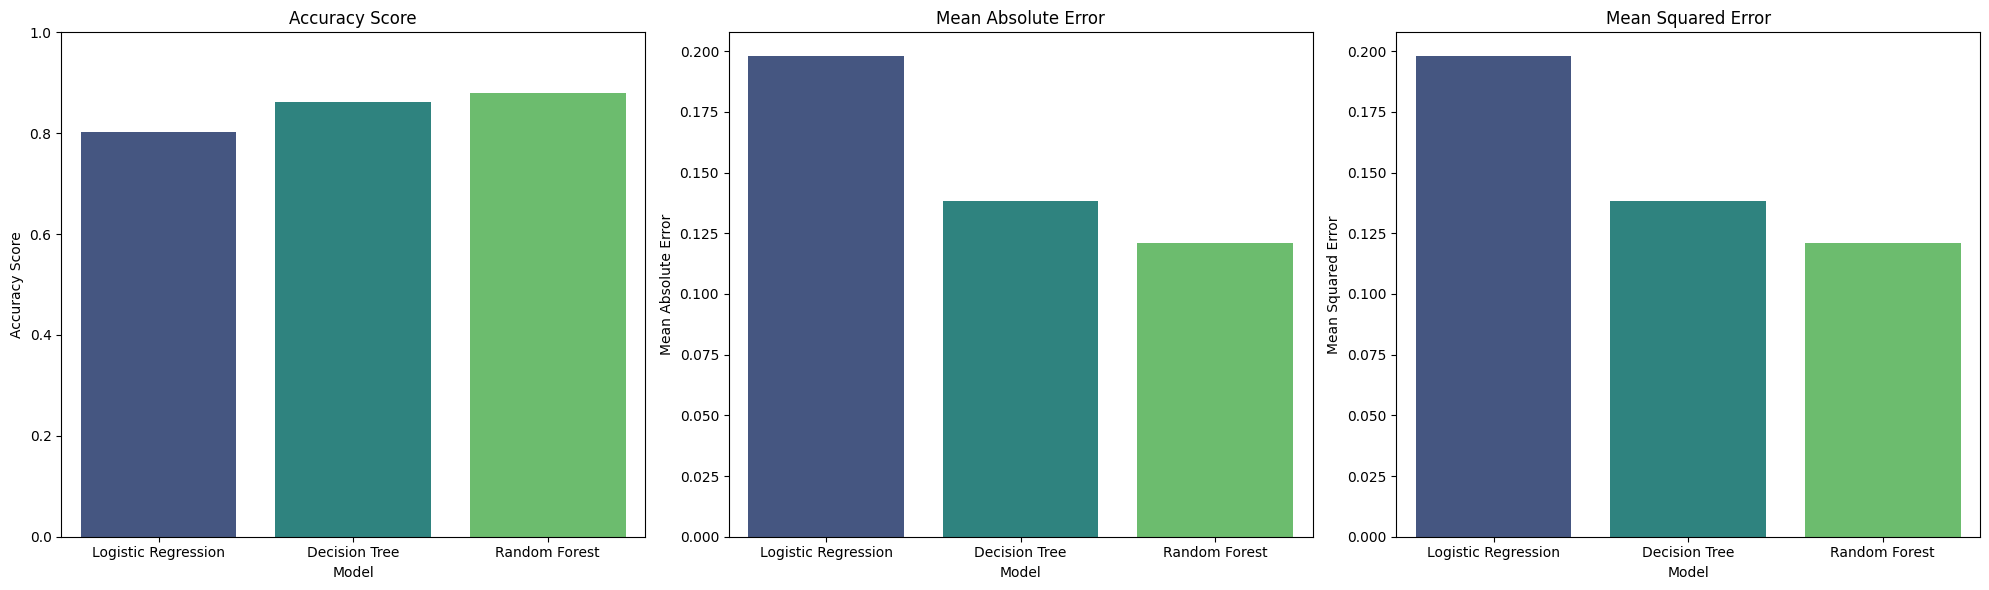

In [195]:
# Calculate metrics
data = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy Score': [accuracy_score(y_test, LR_pred), accuracy_score(y_test, DT_pred), accuracy_score(y_test, RF_pred)],
    'Mean Absolute Error': [mean_absolute_error(y_test, LR_pred), mean_absolute_error(y_test, DT_pred), mean_absolute_error(y_test, RF_pred)],
    'Mean Squared Error': [mean_squared_error(y_test, LR_pred), mean_squared_error(y_test, DT_pred), mean_squared_error(y_test, RF_pred)]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Create a figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Plot metrics
for ax, metric in zip(axes, ['Accuracy Score', 'Mean Absolute Error', 'Mean Squared Error']):
    sns.barplot(x=df['Model'], y=df[metric], ax=ax, palette='viridis')
    ax.set_title(metric)
    if metric == 'Accuracy Score':
        ax.set_ylim(0, 1)  # Assuming accuracy is between 0 and 1

# Display the plot
plt.tight_layout()
plt.show()

**Feature Importance**

Feature Importance for best model

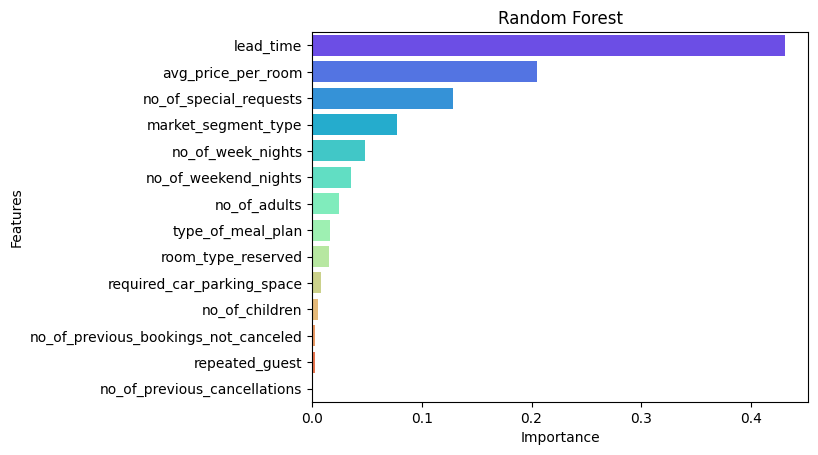

In [199]:
#random forest
feature_importance = pd.DataFrame({'Features': X_train.columns, 'Importance': best_RF.feature_importances_})
feature_importance.sort_values(by='Importance', ascending=False, inplace=True)
feature_importance.reset_index(drop=True, inplace=True)
sns.barplot(x = 'Importance', y = 'Features', data = feature_importance, palette='rainbow').set_title('Random Forest')
plt.show()

The bar chart shows that in a Random Forest model, "lead time" (the time between booking and stay) is the most important factor affecting predictions. The "average price per room" and "number of special requests" also play significant roles. "Market segment type" and the number of nights stayed (both weekdays and weekends) have moderate importance. Meanwhile, factors like the number of adults and children, meal plan type, room type, and parking needs have less impact. Historical data such as previous bookings, repeated guest status, and past cancellations are the least influential. Overall, time and cost factors are most critical, while demographic and booking history details matter less.

_Save Model_
-

In [200]:
joblib.dump(best_RF, "model.pkl")            # save model for Deployment
joblib.dump(scaler, "scaler.pkl")          # save scaler for Deployment

['scaler.pkl']